# Mushroom Classification

A classification model to predict the edibility of a mushroom

In [20]:
import pandas as pd
import numpy as np
import pickle

#dataset at https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download
mush = pd.read_csv('mushrooms.csv')
mush = mush.dropna()
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


First we load the model, then we have to encode all the unieq letters into numbers, so our clasificaion algorythem can recognise them as valid inputs

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

X = mush.drop(['class'],axis=1)
y = mush['class']

encoder = LabelEncoder()

def encode(elms):
    res = encoder.fit_transform(elms)
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
    return res

X_encoded = X.apply(encode)
y_encoded = encode(y)

# splitting dataset to training and test data
X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y_encoded, test_size=0.2, random_state=1
)

{'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
{'f': 0, 'g': 1, 's': 2, 'y': 3}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
{'f': 0, 't': 1}
{'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
{'a': 0, 'f': 1}
{'c': 0, 'w': 1}
{'b': 0, 'n': 1}
{'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
{'e': 0, 't': 1}
{'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
{'f': 0, 'k': 1, 's': 2, 'y': 3}
{'f': 0, 'k': 1, 's': 2, 'y': 3}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
{'p': 0}
{'n': 0, 'o': 1, 'w': 2, 'y': 3}
{'n': 0, 'o': 1, 't': 2}
{'e': 0, 'f': 1, 'l': 2, 'n': 3, 'p': 4}
{'b': 0, 'h': 1, 'k': 2, 'n': 3, 'o': 4, 'r': 5, 'u': 6, 'w': 7, 'y': 8}
{'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5}
{'d': 0, 'g': 1, 'l': 2, 'm': 3, 'p': 4, 'u': 5, 'w': 6}
{'e': 0, 'p': 1}


In [22]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1610,5,0,4,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,2,0,1
1939,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,2,3,1
5573,5,3,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,0
7076,5,2,2,0,8,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,2
2000,5,0,4,1,5,1,0,0,10,1,...,2,3,3,0,2,1,4,3,4,0


In [23]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions)
accuracy = model.score(X_test,y_test)
print(accuracy)

[0. 1. 1. ... 1. 0. 0.]
1.0


In [24]:
with open('model.pkl','wb') as file:
    pickle.dump(model, file)

In [36]:
#libraries for cross validation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

print("Matrix of features", X_encoded, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y_encoded, sep='\n')

Matrix of features
      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                

In [32]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [29]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [34]:
decision_tree_result = cross_validation(model, X_encoded, y_encoded, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([1.        , 1.        , 1.        , 0.99753846, 0.99014778]), 'Mean Validation Accuracy': 99.75372489579385, 'Validation Precision scores': array([1.        , 1.        , 1.        , 1.        , 0.99283796]), 'Mean Validation Precision': 0.9985675917636527, 'Validation Recall scores': array([1.        , 1.        , 1.        , 0.99703484, 0.99283796]), 'Mean Validation Recall': 0.9979745598881895, 'Validation F1 scores': array([1.        , 1.        , 1.        , 0.99851522, 0.99283796]), 'Mean Validation F1 Score': 0.9982706355646919}


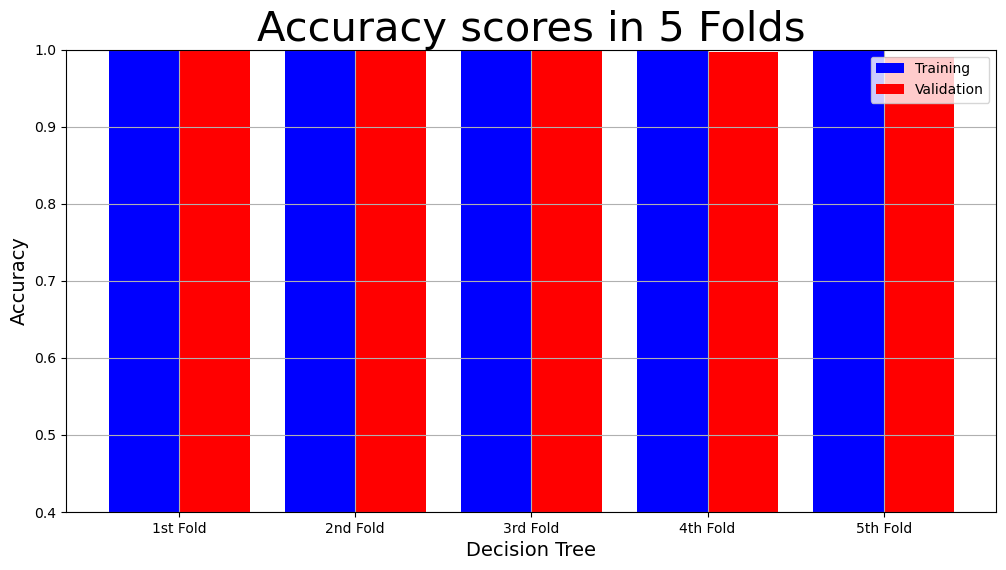

In [35]:
# Plot Accuracy Result
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])